#### Decision Trees 
##### Decision Trees are a type of supervised learning algorithm used for classification and regression tasks. They model decisions and their possible consequences in a tree-like structure, where:

##### Nodes represent decisions or tests on attributes.
##### Edges represent the outcome of those tests.
##### Leaves represent the final decision or prediction.

Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.24      0.37       323
     neutral       0.50      0.01      0.01       313
    positive       0.78      0.99      0.87      1963

    accuracy                           0.78      2599
   macro avg       0.69      0.41      0.42      2599
weighted avg       0.75      0.78      0.71      2599



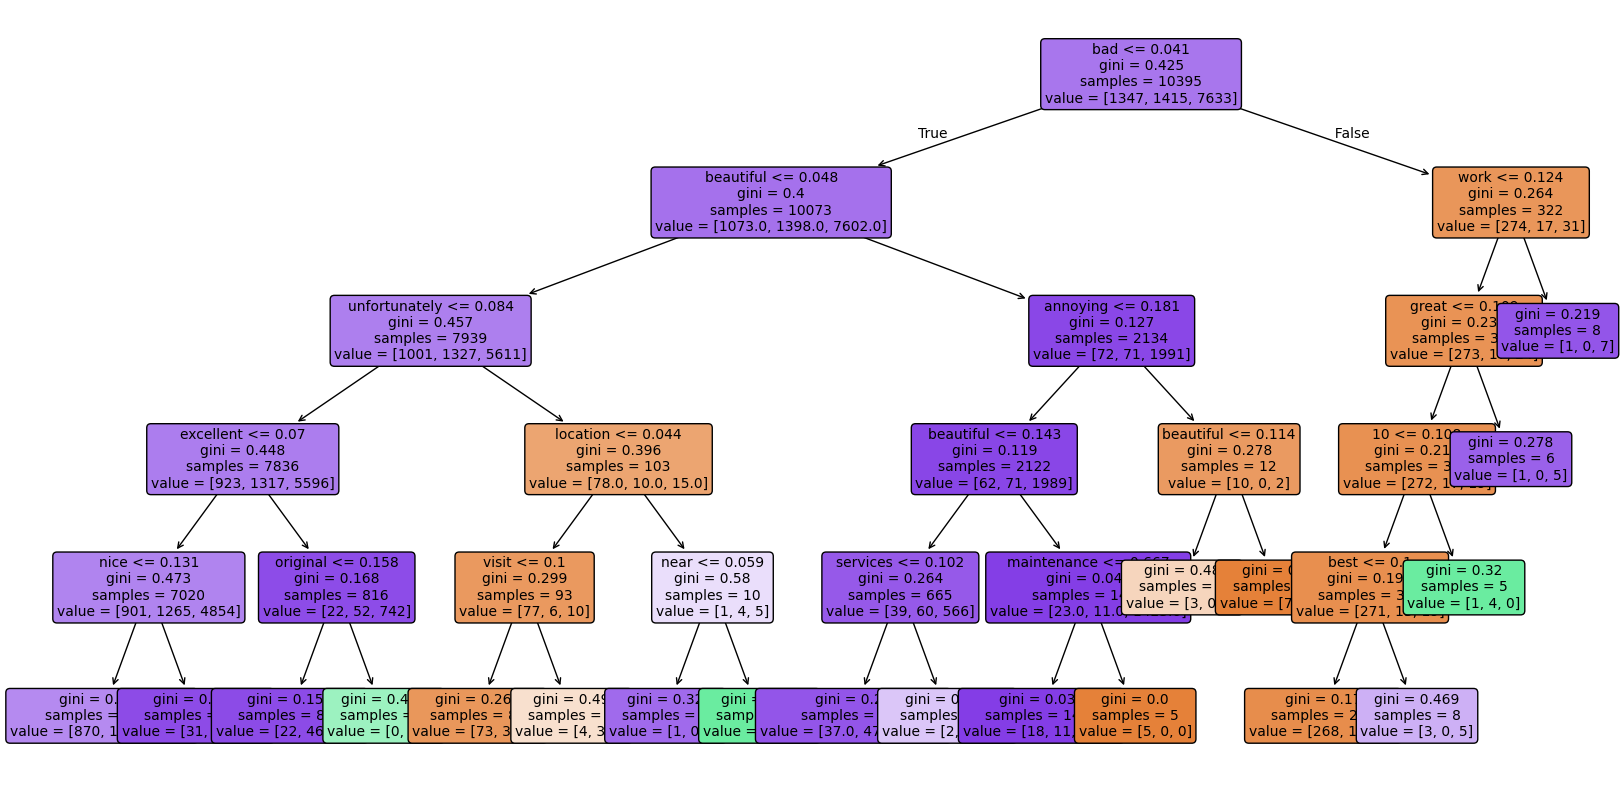

Review: The hotel was excellent with great service and beautiful views.
Predicted Sentiment: positive
Review: The experience was terrible, and the room was dirty.
Predicted Sentiment: positive


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the data
reviews_data = pd.read_csv("D:/Associate - Junior DS Assessment/Junior (A - L2) Data Science/Data/final_ds_nlp/modified_final_file.csv")

# Drop rows with missing values in the relevant columns
reviews_data = reviews_data.dropna(subset=['translated_content', 'sentiment2'])

# Initialize the TF-IDF Vectorizer and transform the review texts
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews_data['translated_content'])
y = reviews_data['sentiment2']  # Sentiment column should contain classes like 'positive', 'neutral', 'negative'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier with pruning
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
feature_names = vectorizer.get_feature_names_out()  # Get feature names from the TF-IDF Vectorizer

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(clf, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()

# Test with new examples
new_reviews = [
    "The hotel was excellent with great service and beautiful views.",
    "The experience was terrible, and the room was dirty."
]

# Transform the new reviews using the same vectorizer
new_reviews_transformed = vectorizer.transform(new_reviews)

# Predict sentiment for the new reviews
predicted_sentiments = clf.predict(new_reviews_transformed)

# Display predictions
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
